In [17]:
import os
import netCDF4
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
#import rasterio as rio
#from rasterio.plot import plotting_extent
#import earthpy as et
#import earthpy.spatial as es
#import earthpy.plot as ep
import xarray as xr
#import cartopy.crs as ccrs
import pandas as pd


In [18]:
data = xr.open_dataset("LsAI_EX/Atmo_SAf.nc")
data

<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 81, time: 24)
Coordinates:
  * time       (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2019-12-01
  * longitude  (longitude) float32 14.0 14.25 14.5 14.75 ... 33.5 33.75 34.0
  * latitude   (latitude) float32 -6.0 -6.25 -6.5 -6.75 ... -25.5 -25.75 -26.0
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    e          (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Wed Mar 31 16:50:01 2021: cdo sellonlatbox,14,34,-26,-6 Atm...
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [7]:
lats = data.variables["latitude"][:]
lons = data.variables["longitude"][:]
time = data.variables["time"][:]
t2m = data.variables["t2m"][:]
prcp = data.variables['tp'][:]

In [7]:
t2m_2003 = data["t2m"][0:12,:,:].groupby("time").mean(["latitude", "longitude"])-273.16
t2m_2019 = data["t2m"][12:24,:,:].groupby("time").mean(["latitude", "longitude"])-273.16
prcp_2003 = data["tp"][0:12,:,:].groupby("time").mean(["latitude", "longitude"])*1000
prcp_2019 = data["tp"][12:24,:,:].groupby("time").mean(["latitude", "longitude"])*1000
prcp_2019.values

array([4.907605  , 4.9486537 , 2.8673236 , 2.3558474 , 0.33988488,
       0.03721677, 0.01236805, 0.1274257 , 0.4295151 , 1.7376873 ,
       3.7418754 , 5.7322993 ], dtype=float32)

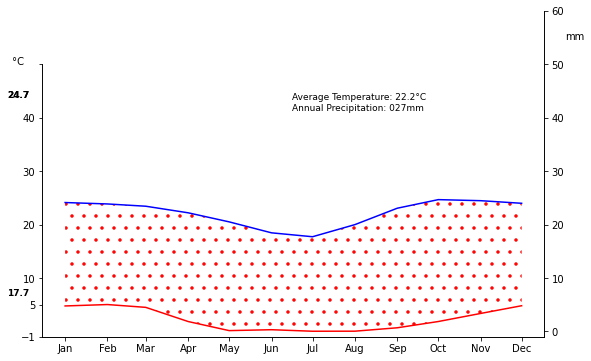

In [8]:

# let's start plotting
fig, temp = plt.subplots(1, figsize=(9,6))
precip=temp.twinx()#using two y-axis for temp (left) und for precip (right)
temp.set_ylim([-1,60])#same limits for both y axis
precip.set_ylim([-1,60])



#plot data
temp.plot(prcp_2003['time'],prcp_2003.values, color='red')
precip.plot(prcp_2003['time'],t2m_2003.values, color='blue',)# drawstyle="steps-mid")

#for humid
temp.fill_between(prcp_2003['time'],t2m_2003.values,prcp_2003.values,where=(prcp_2003.values > t2m_2003.values),edgecolor='blue', hatch='||', facecolor='none',linewidth=0.0,)# step='mid')

#for dry
#temp.fill_between(for_plotDF.index,for_plotDF['Tmean'],for_plotDF['Precip'],where=(for_plotDF['Precip'] <= for_plotDF['Tmean']),edgecolor='red', hatch='.', facecolor='none',linewidth=0.0,)# step='mid')
temp.fill_between(prcp_2003['time'],t2m_2003.values,prcp_2003.values,where=(prcp_2003.values <= t2m_2003.values),edgecolor='red', hatch='.', facecolor='none',linewidth=0.0,)# step='mid')
#for wet
#precip.fill_between(for_plotDF.index,for_plotDF['Precip'],50.0,where=(for_plotDF['Precip']> 50.0),facecolor='blue')# step='mid')
temp.fill_between(prcp_2003['time'],prcp_2003.values,50,where=(prcp_2003.values > 50),edgecolor='blue')# step='mid')
#set y-ticks and labels
temp.set_yticks([-1,5,10,20,30,40,50])
plt.setp(temp.get_yticklabels()[6:], visible=False)
precip.set_yticks([0,10,20,30,40,50,60])
precip.set_yticklabels([0,10,20,30,40,50,60])
temp.set_ylabel('°C', labelpad=0, rotation=0.0, ha='left', va='center')
temp.yaxis.set_label_coords(-0.06,0.845)
precip.set_ylabel('mm', labelpad=0, rotation=0.0, ha='right', va='center')
precip.yaxis.set_label_coords(1.08,0.92)
temp.set_xticks(prcp_2003['time'])
mon = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec') # nice labels
temp.set_xticklabels(mon)


precip.spines['top'].set_visible(False)
temp.spines['top'].set_visible(False)
temp.spines['left'].set_bounds(-1, 50)
precip.spines['left'].set_bounds(-1, 50)

#Plotting all the text
#fig.text(0.01, 0.95, (str(data.iloc[1][3])+' ('+str(data.iloc[1][6])+'m)'),transform=fig.transFigure, fontsize=11)
#fig.text(0.01, 0.87, ('Lat:'+'{:03.2f}'.format(data.iloc[1][4])+' Lon:'+'{:03.2f}'.format(data.iloc[1][5])+'\nTime span: 1981-2010'),transform=fig.transFigure, fontsize=9)
fig.text(0.51, 0.65, ('Average Temperature: '+'{:03.1f}°C'.format(t2m_2003.values.mean())+'\nAnnual Precipitation: '+'{:03.0f}mm'.format(prcp_2003.values.sum())),transform=fig.transFigure, fontsize=9)
fig.text(0.105, 0.68, ('{:03.1f}'.format(t2m_2003.values.max())),transform=fig.transFigure, fontsize=9,weight='bold', ha='right')
fig.text(0.105, 0.68, ('{:03.1f}'.format(t2m_2003.values.max())),transform=fig.transFigure, fontsize=9,weight='bold', ha='right')
fig.text(0.105, 0.22, ('{:03.1f}'.format(t2m_2003.values.min())),transform=fig.transFigure, fontsize=9,weight='bold', ha='right')
#fig.text(0.105, 0.68, ('{:03.1f}'.format(abs_Tmax)+'\n'+'{:03.1f}'.format(Tmax)),transform=fig.transFigure, fontsize=9,weight='bold', ha='right')
#fig.text(0.105, 0.22, ('{:03.1f}'.format(Tmin)+'\n'+'{:03.1f}'.format(abs_Tmin)),transform=fig.transFigure, fontsize=9,weight='bold', ha='right')
#fig.savefig(str(data.iloc[1][3])+'.png',dpi=300, bbox_inches='tight')

#pl=fig.savefig('figures/walter_2003.jpg',dpi=300)
plt.show()

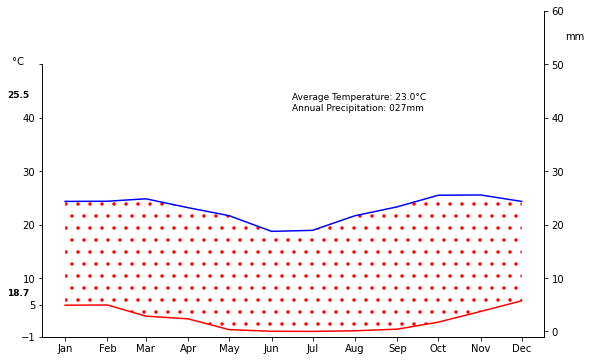

<Figure size 432x288 with 0 Axes>

In [10]:

# let's start plotting
fig, temp = plt.subplots(1, figsize=(9,6))
precip=temp.twinx()#using two y-axis for temp (left) und for precip (right)
temp.set_ylim([-1,60])#same limits for both y axis
precip.set_ylim([-1,60])



#plot data
temp.plot(prcp_2019['time'],prcp_2019.values, color='red')
precip.plot(prcp_2019['time'],t2m_2019.values, color='blue',)# drawstyle="steps-mid")

#for humid
temp.fill_between(prcp_2019['time'],t2m_2019.values,prcp_2019.values,where=(prcp_2019.values > t2m_2019.values),edgecolor='blue', hatch='||', facecolor='none',linewidth=0.0,)# step='mid')

#for dry
#temp.fill_between(for_plotDF.index,for_plotDF['Tmean'],for_plotDF['Precip'],where=(for_plotDF['Precip'] <= for_plotDF['Tmean']),edgecolor='red', hatch='.', facecolor='none',linewidth=0.0,)# step='mid')
temp.fill_between(prcp_2019['time'],t2m_2019.values,prcp_2019.values,where=(prcp_2019.values <= t2m_2019.values),edgecolor='red', hatch='.', facecolor='none',linewidth=0.0,)# step='mid')
#for wet
#precip.fill_between(for_plotDF.index,for_plotDF['Precip'],50.0,where=(for_plotDF['Precip']> 50.0),facecolor='blue')# step='mid')
temp.fill_between(prcp_2019['time'],prcp_2019.values,50,where=(prcp_2019.values > 50),edgecolor='blue')# step='mid')
#set y-ticks and labels
temp.set_yticks([-1,5,10,20,30,40,50])
plt.setp(temp.get_yticklabels()[6:], visible=False)
precip.set_yticks([0,10,20,30,40,50,60])
precip.set_yticklabels([0,10,20,30,40,50,60])
temp.set_ylabel('°C', labelpad=0, rotation=0.0, ha='left', va='center')
temp.yaxis.set_label_coords(-0.06,0.845)
precip.set_ylabel('mm', labelpad=0, rotation=0.0, ha='right', va='center')
precip.yaxis.set_label_coords(1.08,0.92)
temp.set_xticks(prcp_2019['time'])
mon = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec') # nice labels
temp.set_xticklabels(mon)


precip.spines['top'].set_visible(False)
temp.spines['top'].set_visible(False)
temp.spines['left'].set_bounds(-1, 50)
precip.spines['left'].set_bounds(-1, 50)

#Plotting all the text
#fig.text(0.01, 0.95, (str(data.iloc[1][3])+' ('+str(data.iloc[1][6])+'m)'),transform=fig.transFigure, fontsize=11)
#fig.text(0.01, 0.87, ('Lat:'+'{:03.2f}'.format(data.iloc[1][4])+' Lon:'+'{:03.2f}'.format(data.iloc[1][5])+'\nTime span: 1981-2010'),transform=fig.transFigure, fontsize=9)
fig.text(0.51, 0.65, ('Average Temperature: '+'{:03.1f}°C'.format(t2m_2019.values.mean())+'\nAnnual Precipitation: '+'{:03.0f}mm'.format(prcp_2019.values.sum())),transform=fig.transFigure, fontsize=9)
fig.text(0.105, 0.68, ('{:03.1f}'.format(t2m_2019.values.max())),transform=fig.transFigure, fontsize=9,weight='bold', ha='right')
fig.text(0.105, 0.22, ('{:03.1f}'.format(t2m_2019.values.min())),transform=fig.transFigure, fontsize=9,weight='bold', ha='right')
#fig.text(0.105, 0.22, ('{:03.1f}'.format(t2m_2019.values.min())+'\n'+'{:03.1f}'.format(abs_Tmin)),transform=fig.transFigure, fontsize=9,weight='bold', ha='right')
#fig.savefig(str(data.iloc[1][3])+'.png',dpi=300, bbox_inches='tight')
px=plt.figure()
#pl=fig.savefig('figures/walter_2019.jpg',dpi=300)
plt.show()